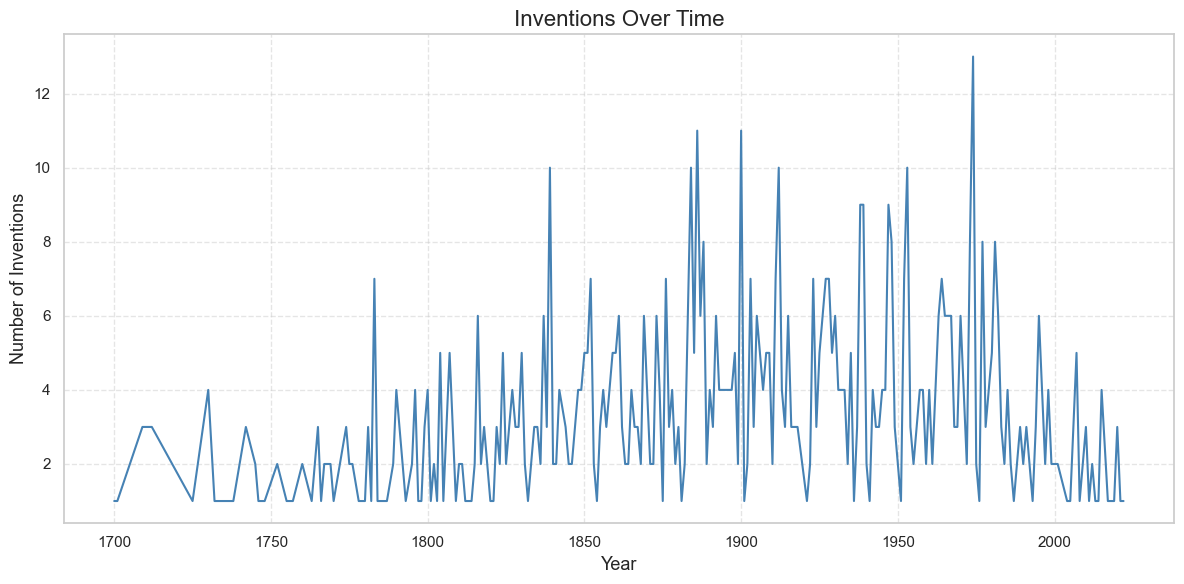

C:\Users\isaac\AppData\Local\Temp\ipykernel_152084\4209149915.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


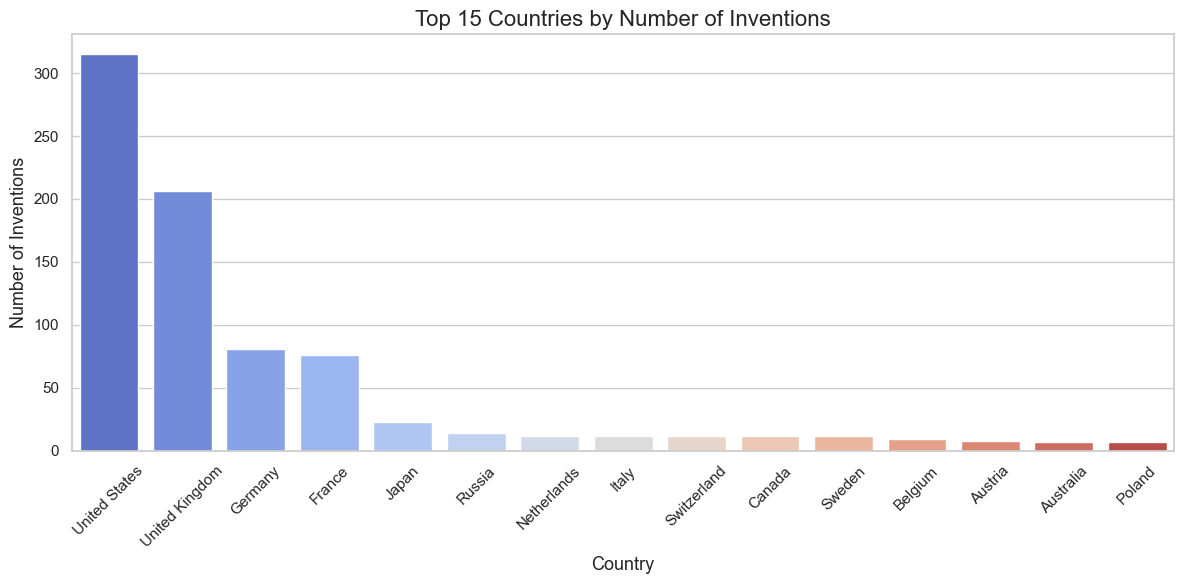

C:\Users\isaac\AppData\Local\Temp\ipykernel_152084\4209149915.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


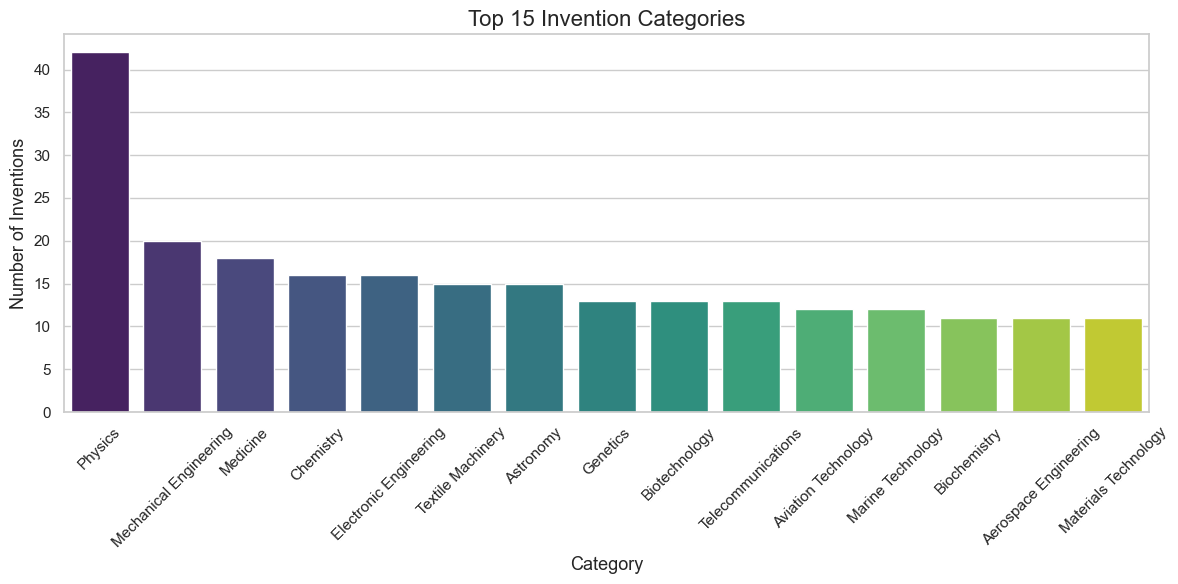

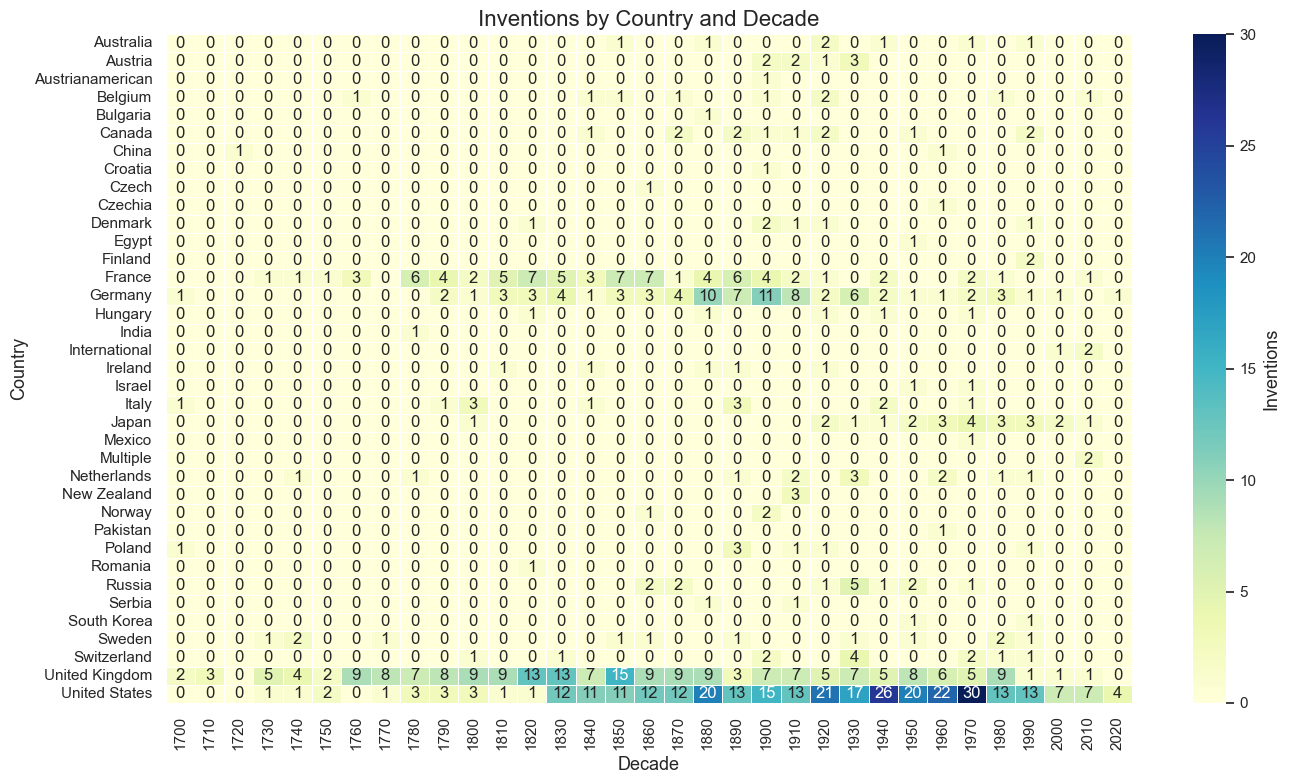

C:\Users\isaac\AppData\Local\Temp\ipykernel_152084\4209149915.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


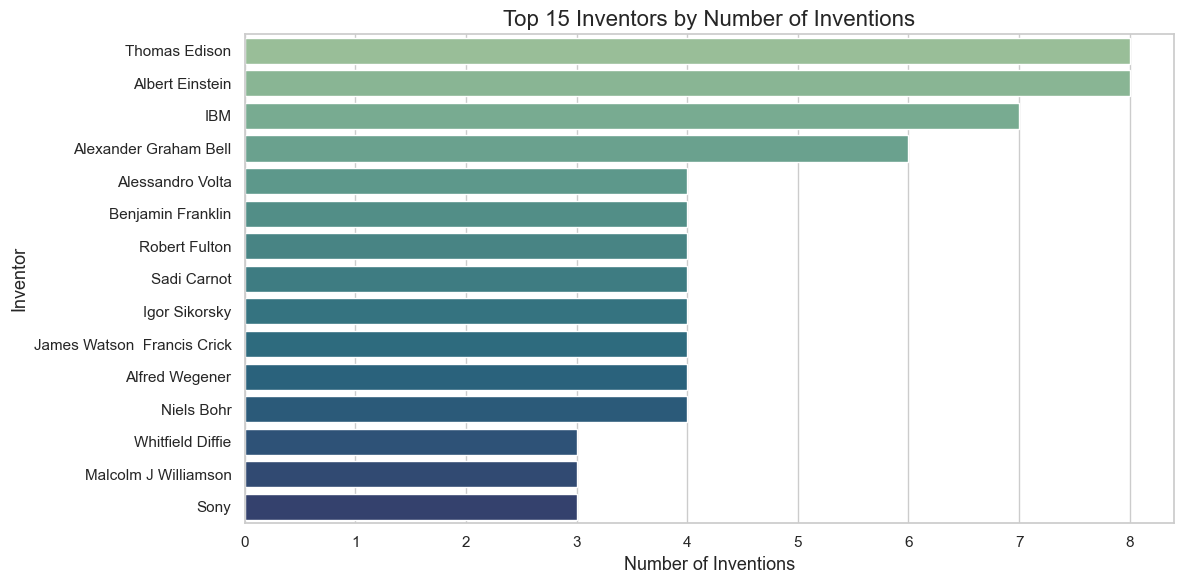

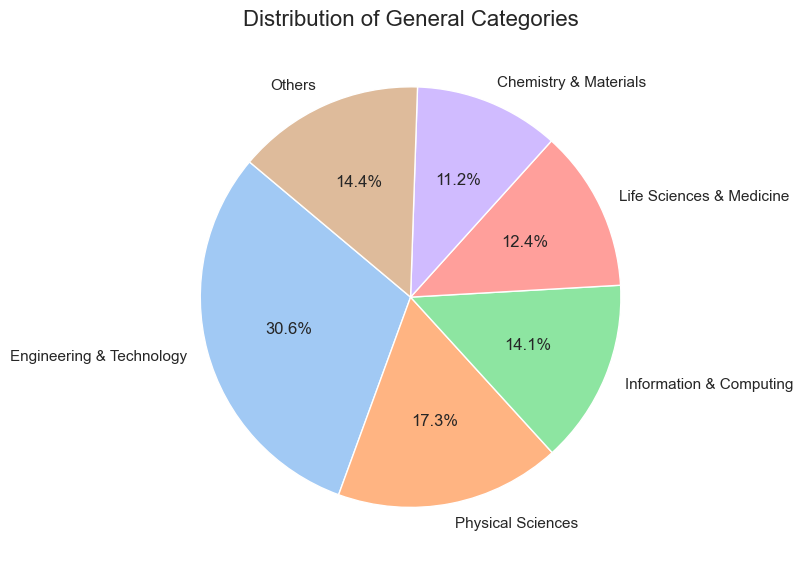

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Set global style
sns.set(style="whitegrid")
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["xtick.labelsize"] = 11
plt.rcParams["ytick.labelsize"] = 11
plt.rcParams["legend.fontsize"] = 11

df = pd.read_csv("../../raw_data/clean_data/clean_data_dd.csv")

df.columns = ["Year", "Country", "Invention", "Inventor", "Category", "General_Category"]

#Clean Year
df = df[pd.to_numeric(df["Year"], errors="coerce").notna()]
df["Year"] = df["Year"].astype(int)

#Expand countries (split by ;)
df["Country"] = df["Country"].astype(str).str.split(";")
df = df.explode("Country")
df["Country"] = df["Country"].str.strip()

#Add decade
df["Decade"] = (df["Year"] // 10) * 10

#Grouped heatmap data
heat_data = df.groupby(["Country", "Decade"]).size().unstack(fill_value=0)

#=== 1. Inventions Over Time ===
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby("Year").size(), color="steelblue")
plt.title("Inventions Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Inventions")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#=== 2. Top 10 Countries ===
plt.figure(figsize=(12, 6))
sns.barplot(
    x=df["Country"].value_counts().nlargest(15).index,
    y=df["Country"].value_counts().nlargest(15).values,
    palette="coolwarm"
)
plt.title("Top 15 Countries by Number of Inventions")
plt.xlabel("Country")
plt.ylabel("Number of Inventions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#=== 3. Top 10 Categories ===
plt.figure(figsize=(12, 6))
sns.barplot(
    x=df["Category"].value_counts().nlargest(15).index,
    y=df["Category"].value_counts().nlargest(15).values,
    palette="viridis"
)
plt.title("Top 15 Invention Categories")
plt.xlabel("Category")
plt.ylabel("Number of Inventions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#=== 4. Heatmap: Inventions by Country and Decade ===
plt.figure(figsize=(14, 8))
sns.heatmap(
    heat_data, cmap="YlGnBu", annot=True, fmt="d",
    linewidths=0.5, cbar_kws={'label': 'Inventions'}
)
plt.title("Inventions by Country and Decade")
plt.xlabel("Decade")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

#=== 5. Top 10 Inventors ===
df["Inventor"] = df["Inventor"].astype(str).str.split(";")
df = df.explode("Inventor")
df["Inventor"] = df["Inventor"].str.strip() 

plt.figure(figsize=(12, 6))
sns.barplot(
    x=df["Inventor"].value_counts().nlargest(15).values,
    y=df["Inventor"].value_counts().nlargest(15).index,
    palette="crest"
)
plt.title("Top 15 Inventors by Number of Inventions")
plt.xlabel("Number of Inventions")
plt.ylabel("Inventor")
plt.tight_layout()
plt.show()


category_counts = df["General_Category"].value_counts()
total = category_counts.sum()


category_major = category_counts[category_counts / total >= 0.10]
category_minor = category_counts[category_counts / total < 0.10]


category_combined = category_major.copy()
category_combined["Others"] = category_minor.sum()

plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel", len(category_combined))
category_combined.plot(
    kind="pie", autopct="%1.1f%%", startangle=140,
    colors=colors, wedgeprops={"edgecolor": "white"}
)
plt.title("Distribution of General Categories")
plt.ylabel("")
plt.tight_layout()
plt.show()




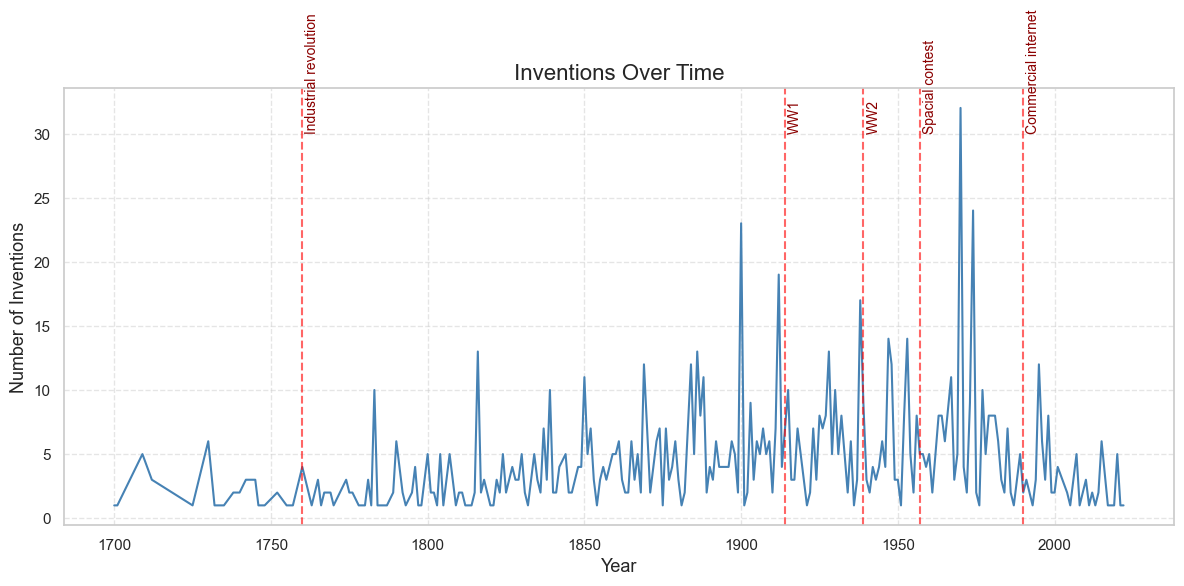

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby("Year").size(), color="steelblue")
plt.title("Inventions Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Inventions")
plt.grid(True, linestyle='--', alpha=0.5)

#Events
eventos = {
    1760: "Industrial revolution",
    1914: "WW1",
    1939: "WW2",
    1957: "Spacial contest",
    1990: "Commercial internet",
}

for año, etiqueta in eventos.items():
    plt.axvline(x=año, color='red', linestyle='--', alpha=0.6)
    plt.text(año+1, plt.ylim()[1]*0.9, etiqueta, rotation=90, color='darkred', fontsize=10)

plt.tight_layout()
plt.show()


https://data.worldbank.org/indicator/GB.XPD.RSDV.GD.ZS?end=2023&locations=US-GB-DE-FR-JP-RU-NL-IT-CH-CA-SE-BE-AT-AU-PL&start=1996&view=chart